# Chocalate Scraping with Beautiful Soup

After eating chocolate bars your whole life, you’ve decided to go on a quest to find the greatest chocolate bar in the world.

You’ve found a website that has over 1700 reviews of chocolate bars from all around the world. It’s displayed in the web browser on this page.

The data is displayed in a table, instead of in a csv or json. Thankfully, we have the power of BeautifulSoup that will help us transform this webpage into a DataFrame that we can manipulate and analyze.

The rating scale is from 1-5, as described in this review guide. A 1 is “unpleasant” chocolate, while a 5 is a bar that transcends “beyond the ordinary limits”.

Some questions we thought about when we found this dataset were: Where are the best cocoa beans grown? Which countries produce the highest-rated bars? What’s the relationship between cocoa solids percentage and rating?

Can we find a way to answer these questions, or uncover more questions, using BeautifulSoup and Pandas?

## Make some chocolate soup


Let’s make a request to this site to get the raw HTML, which we can later turn into a BeautifulSoup object.

The URL is:

https://s3.amazonaws.com/codecademy-content/courses/beautifulsoup/cacao/index.html

In [28]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

choco_request = requests.get('https://s3.amazonaws.com/codecademy-content/courses/beautifulsoup/cacao/index.html')
choco = choco_request.content
print(choco)

b'<!DOCTYPE html>\n<html lang="en">\n   <head>\n      <meta charset="utf-8">\n      <style>\n         #cacaoTable {\n         border-collapse: collapse;\n         border: 2px black solid;\n         font: 12px sans-serif;\n         }\n         #cacaoTable td {\n         border: 1px black solid;\n         padding: 5px;\n         }\n         #infoContainer {\n         margin-bottom: 10px;\n         display: inline-block;\n         margin-right: 10px;\n         }\n         #chocolate {\n         width: 300px;\n         }\n         #picContainer {\n         display: inline;\n         }\n      </style>\n   </head>\n   <body>\n      <!-- <script src="http://d3js.org/d3.v3.min.js"></script> -->\n      <div id="banner">\n         <h1>Cacao Ratings</h1>\n      </div>\n      <div id="infoContainer">\n         <table class="infoTable">\n            <tr>\n               <td>Compiled ratings of over 1700 Chocolate bars</td>\n            </tr>\n            <tr>\n               <td>Ratings are from 1-

In [29]:
# Create a BeautifulSoup object called soup to traverse this HTML.
# Use "html.parser" as the parser, and the content of the response you got from your request as the document
soup = BeautifulSoup(choco, 'html.parser')
print(soup)

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<style>
         #cacaoTable {
         border-collapse: collapse;
         border: 2px black solid;
         font: 12px sans-serif;
         }
         #cacaoTable td {
         border: 1px black solid;
         padding: 5px;
         }
         #infoContainer {
         margin-bottom: 10px;
         display: inline-block;
         margin-right: 10px;
         }
         #chocolate {
         width: 300px;
         }
         #picContainer {
         display: inline;
         }
      </style>
</head>
<body>
<!-- <script src="http://d3js.org/d3.v3.min.js"></script> -->
<div id="banner">
<h1>Cacao Ratings</h1>
</div>
<div id="infoContainer">
<table class="infoTable">
<tr>
<td>Compiled ratings of over 1700 Chocolate bars</td>
</tr>
<tr>
<td>Ratings are from 1-5</td>
</tr>
</table>
</div>
<div id="picContainer">
<img id="chocolate" src="chocolate.jpg"/>
</div>
<table id="cacaoTable">
<tr>
<td class="Company">Company 
       

## How are ratings distributed?

How many terrible chocolate bars are out there? And how many earned a perfect 5? Let’s make a histogram of this data.

The first thing to do is to put all of the ratings into a list.

Use a command on the soup object to get all of the tags that contain the ratings.

In [30]:
rating_tags = soup.find_all(attrs={'class':'Rating'})
print(rating_tags)

[<td class="Rating">Rating</td>, <td class="Rating">3.75</td>, <td class="Rating">2.75</td>, <td class="Rating">3</td>, <td class="Rating">3.5</td>, <td class="Rating">3.5</td>, <td class="Rating">2.75</td>, <td class="Rating">3.5</td>, <td class="Rating">3.5</td>, <td class="Rating">3.75</td>, <td class="Rating">4</td>, <td class="Rating">2.75</td>, <td class="Rating">3</td>, <td class="Rating">3.25</td>, <td class="Rating">3.75</td>, <td class="Rating">2.75</td>, <td class="Rating">3</td>, <td class="Rating">3.25</td>, <td class="Rating">4</td>, <td class="Rating">3.25</td>, <td class="Rating">3.5</td>, <td class="Rating">4</td>, <td class="Rating">3.5</td>, <td class="Rating">3.75</td>, <td class="Rating">3.75</td>, <td class="Rating">3.75</td>, <td class="Rating">2.75</td>, <td class="Rating">3.25</td>, <td class="Rating">3.5</td>, <td class="Rating">3.5</td>, <td class="Rating">2.75</td>, <td class="Rating">3</td>, <td class="Rating">3</td>, <td class="Rating">3.75</td>, <td class

In [31]:
# Create an empty list to store all the ratings
ratings = []

# Loop through the ratings tags and get the text contained in each one. Add it to the ratings list
for tag in rating_tags[1:]:
    ratings.append(float(tag.get_text()))

print(ratings)

[3.75, 2.75, 3.0, 3.5, 3.5, 2.75, 3.5, 3.5, 3.75, 4.0, 2.75, 3.0, 3.25, 3.75, 2.75, 3.0, 3.25, 4.0, 3.25, 3.5, 4.0, 3.5, 3.75, 3.75, 3.75, 2.75, 3.25, 3.5, 3.5, 2.75, 3.0, 3.0, 3.75, 2.75, 2.75, 2.75, 2.75, 3.0, 2.5, 2.5, 3.5, 3.5, 3.5, 3.5, 2.75, 3.0, 2.5, 2.5, 2.75, 2.5, 3.0, 3.25, 3.0, 3.25, 4.0, 3.75, 4.0, 3.0, 3.0, 2.75, 3.5, 3.0, 3.75, 3.0, 2.75, 2.75, 3.0, 3.25, 3.5, 3.0, 3.25, 3.25, 3.25, 3.25, 3.5, 3.75, 4.0, 4.0, 5.0, 3.0, 3.0, 3.5, 3.75, 4.0, 3.5, 3.5, 5.0, 4.0, 3.25, 2.75, 3.75, 3.75, 4.0, 3.0, 3.5, 3.0, 2.5, 2.75, 3.0, 3.5, 3.75, 3.5, 3.25, 3.25, 3.5, 3.75, 3.5, 4.0, 4.0, 3.75, 3.25, 3.25, 3.5, 3.5, 3.75, 3.5, 3.75, 4.0, 2.75, 3.25, 3.5, 3.25, 3.75, 4.0, 2.75, 1.75, 3.75, 3.25, 3.25, 3.5, 2.5, 2.75, 1.75, 3.0, 3.0, 3.25, 3.75, 2.75, 3.75, 3.75, 3.75, 3.75, 2.5, 3.0, 3.25, 3.5, 3.0, 2.5, 2.5, 2.75, 3.5, 3.5, 4.0, 3.25, 3.5, 3.75, 2.75, 3.5, 3.75, 3.25, 3.0, 3.25, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 3.5, 3.5, 3.25, 3.5, 2.75, 3.0, 3.5, 3.5, 3.5, 3.5, 4.0, 4.0, 3.75, 2.

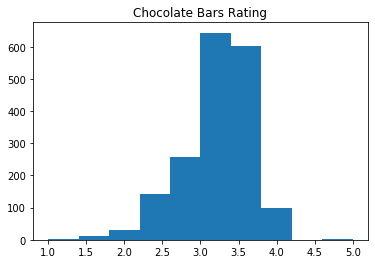

In [32]:
# Using Matplotlib create a histogram of the ratings values
plt.hist(ratings)
plt.title('Chocolate Bars Rating')
plt.show()

## Which chocolatier makes the best chocolate?

We want to now find the 10 most highly rated chocolatiers. One way to do this is to make a DataFrame that has the chocolate companies in one column, and the ratings in another. Then, we can do a groupby to find the ones with the highest average rating.

First, let’s find all the tags on the webpage that contain the company names.

In [33]:
company_name_tags = soup.select('.Company')
print(company_name_tags)

[<td class="Company">Company 
               (Maker-if known)
            </td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">Acalli</td>, <td class="Company">Acalli</td>, <td class="Company">Adi</td>, <td class="Company

In [34]:
# Make an empty list to hold company names
company_names = []

# Loop through the tags containing company names, and add the text from each tag to the list you created
for tag in company_name_tags[1:]:
    company_names.append(tag.get_text())
    
print(company_names)

['A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'Acalli', 'Acalli', 'Adi', 'Adi', 'Adi', 'Adi', 'Aequare (Gianduja)', 'Aequare (Gianduja)', 'Ah Cacao', "Akesson's (Pralus)", "Akesson's (Pralus)", "Akesson's (Pralus)", 'Alain Ducasse', 'Alain Ducasse', 'Alain Ducasse', 'Alain Ducasse', 'Alain Ducasse', 'Alexandre', 'Alexandre', 'Alexandre', 'Alexandre', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amatller (Simon Coll)', 'Amatller (Simon Coll)', 'Amatller (Simon Coll)', 'Amatller 

In [35]:
# Create a DataFrame with a column “Company” corresponding to your companies list, 
# and a column “Ratings” corresponding to your ratings list
d = {
    'Company': company_names,
    'Ratings': ratings}

df = pd.DataFrame.from_dict(d)
print(df)

       Company  Ratings
0     A. Morin     3.75
1     A. Morin     2.75
2     A. Morin     3.00
3     A. Morin     3.50
4     A. Morin     3.50
...        ...      ...
1790    Zotter     3.75
1791    Zotter     3.00
1792    Zotter     3.50
1793    Zotter     3.25
1794    Zotter     3.00

[1795 rows x 2 columns]


In [36]:
# Use .groupby to group your DataFrame by Company and take the average of the grouped ratings
mean_values = df.groupby('Company').Ratings.mean()

# Use the .nlargest command to get the 10 highest rated chocolate companies
top_ten = mean_values.nlargest(10)
print(top_ten)

Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Ratings, dtype: float64


## Is more cacao better?

We want to see if the chocolate experts tend to rate chocolate bars with higher levels of cacao to be better than those with lower levels of cacao.

It looks like the cocoa percentages are in the table under the Cocoa Percent column.

Using the same methods you used in the last couple of tasks, create a list that contains all of the cocoa percentages. Store each percent as an integer, after stripping off the % character.

In [37]:
cocoa_percent_tags = soup.select('.CocoaPercent')
cocoa_percents = []
for item in cocoa_percent_tags[1:]:
    percent = float(item.get_text().strip('%'))
    cocoa_percents.append(percent)

In [38]:
# Add the cocoa percentages as a column called "CocoaPercentage" in the DataFrame that has companies and ratings in it
d = {
    'Company': company_names,
    'Ratings': ratings, 
    'CocoaPercentage': cocoa_percents}

df = pd.DataFrame.from_dict(d)
print(df)

       Company  Ratings  CocoaPercentage
0     A. Morin     3.75             63.0
1     A. Morin     2.75             70.0
2     A. Morin     3.00             70.0
3     A. Morin     3.50             70.0
4     A. Morin     3.50             70.0
...        ...      ...              ...
1790    Zotter     3.75             70.0
1791    Zotter     3.00             65.0
1792    Zotter     3.50             65.0
1793    Zotter     3.25             62.0
1794    Zotter     3.00             65.0

[1795 rows x 3 columns]


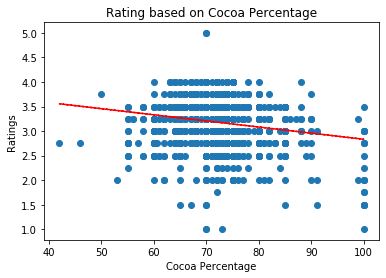

In [39]:
# Make a scatterplot of ratings (your_df.Rating) vs percentage of cocoa (your_df.CocoaPercentage)
plt.clf()
plt.scatter(df.CocoaPercentage, df.Ratings)
plt.xlabel('Cocoa Percentage')
plt.ylabel('Ratings')
plt.title('Rating based on Cocoa Percentage')

z = np.polyfit(df.CocoaPercentage, df.Ratings, 1)
line_function = np.poly1d(z)
plt.plot(df.CocoaPercentage, line_function(df.CocoaPercentage), 'r--')
plt.show()